本文介绍如何使用 numpy，一个强大的 Python 科学计算库。

<!-- more -->

对于 Windows 系统的用户，推荐到加州大学尔湾分校的 [Python whl 库下载站](http://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy) 这里下载与 Intel mkl 链接好的 numpy 版本；注意选择与用户计算机的 python & 操作系统相适应的 numpy 版本。链接了 mkl 与未链接 mkl 的 numpy 在性能上会有显著差异，你可以前往上述网址安装链接了 mkl 库的 numpy。**请在安装其他依赖于 numpy 的包或库前，先安装好 numpy。**

全文默认加载的 numpy 包：

In [1]:
import numpy as np

## 数组创建

numpy 最基础的操作就是创建数组。**数组**可以是高维（多于二维）的；在本文中，把二维的数组也叫做**矩阵**。

用 np.array() 创建数组：

In [2]:
dt1 = [1, 2, 3, 4, 5, 6]
arr1 = np.array(dt1)
print(arr1)  # 一行六列的数组

[1 2 3 4 5 6]


In [3]:
dt2 = [[1, 2, 3], [4, 5, 6]]
arr2 = np.array(dt2)
print(arr2)  # 自动识别为两行三列

[[1 2 3]
 [4 5 6]]


用 arr.shape/ndim/size 来返回数组的尺寸：

In [4]:
print(arr2.shape, '\n',  # 返回结果是一个元组(tuple)
      arr2.ndim, '\n',   # 返回结果是数组的维度（即“轴”的数量，这里只有行和列）
      arr2.size)         # 返回结果是数组的总元素个数

(2, 3) 
 2 
 6


### 特殊矩阵

#### 预分配矩阵：np.empty() / empty\_like()

预分配矩阵只是初始化了矩阵尺寸，但是**不保证元素值为0**。如果想要生成全零阵，使用 np.zeros()。

In [5]:
np.empty([2, 3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [6]:
np.empty_like(arr2)  # 生成一个与 arr2 同尺寸的预分配矩阵

array([[0, 0, 0],
       [0, 0, 0]])

#### 全0 / 全1 / 填充矩阵：np.zeros() / ones() / full()

全 0 与全 1 矩阵很简单：

In [7]:
np.ones([1, 4])

array([[ 1.,  1.,  1.,  1.]])

填充矩阵用指定的数值填充所有的元素：

In [8]:
np.full([2, 3], 1.2)

array([[ 1.2,  1.2,  1.2],
       [ 1.2,  1.2,  1.2]])

以上矩阵也有 like() 形式的命令。

In [9]:
np.zeros_like(arr2)

array([[0, 0, 0],
       [0, 0, 0]])

#### 单位阵：np.identity() / eye()

严格的单位阵使用 np.identity() 命令产生：

In [10]:
np.identity(3)  # 严格正方形单位阵

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

如果是非严格的单位阵，使用 np.eye() 产生：

In [11]:
np.eye(2, 3)  # 不严格的、对角线为 1 的矩阵

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

也可以用参数 k 指定相对主对角线的偏移量。偏移方向以向右上为正，左下为负：

In [12]:
np.eye(3, 3, k=1)

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

#### 对角阵：np.diagflat()

同样使用参数 k 指定偏移量。

In [13]:
np.diagflat([1, 2, 3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### 三角阵：np.tri()

下三角全为 1（包括对角线），其余为 0. 可以指定偏移量：

In [14]:
np.tri(3, 4, k=1)

array([[ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.]])

要截取某个已知矩阵的上三角或者下三角，参考下文的内容。

#### 范德蒙矩阵：np.vander()

范德蒙矩阵（Vandermonde matrix）的定义：

$$ \boldsymbol{V} = \begin{pmatrix}
1 & a_1 & a_1^2 & \ldots & a_1^{m-1} \\
1 & a_2 & a_2^2 & \ldots & a_2^{m-1} \\
1 & a_3 & a_3^2 & \ldots & a_3^{m-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & a_n & a_n^2 & \ldots & a_n^{m-1} 
\end{pmatrix} $$

可以用参数 N 指定列数。

In [15]:
np.vander([1, 2, 3], N=4)

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1]])

### 特殊数列

numpy 里有一系列可以快速生成数列的命令。

#### 等差数列：np.arange()

生成的数列区间，默认是左闭右开 [start, stop)。

In [16]:
np.arange(start=1, stop=7, step=2)

array([1, 3, 5])

#### 线性 / 对数空间：np.linspace() / logspace()

线性空间也是等差的；相比 arange() 命令只能指定步长，线性空间可以指定数组尺寸：

In [17]:
np.linspace(1, 2, num=5)

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ])

也可以利用 endpoint 参数，产生类似 arange() 函数的效果：

In [18]:
np.linspace(1, 2, 5, endpoint=False)

array([ 1. ,  1.2,  1.4,  1.6,  1.8])

logspace() 是以从 $10^{start}$ 到 $10^{end}$ 的对数空间：

In [19]:
np.logspace(1, 2, num=4)

array([  10.        ,   21.5443469 ,   46.41588834,  100.        ])

### 从已有数据转换 / 复制

#### 深度复制：np.copy()

In [20]:
arr3 = np.copy(arr2)
arr3 is arr2

False

In [21]:
arr3 = arr2.copy()
arr3 is arr2

False

#### 类型转换：np.asarray() / asmatrix()

注意：这类函数不会生成一个复制；它们只生成一个**同址引用**：

In [22]:
tmp = np.asarray(arr2) 
arr2[0, 0] = 100
tmp

array([[100,   2,   3],
       [  4,   5,   6]])

In [23]:
tmp is arr2

True

np.asmatrix() 函数非常灵活：

In [24]:
np.asmatrix("1, 2; 3, 4")

matrix([[1, 2],
        [3, 4]])

#### 尺寸重塑：arr.reshape() / resize() / flatten()

reshape() 生成一个重塑后的矩阵，但不改动原矩阵；resize() 则直接将原矩阵重塑。

In [25]:
arr2.reshape(3, 2)

array([[100,   2],
       [  3,   4],
       [  5,   6]])

In [26]:
arr2.resize(3, 2)
arr2

array([[100,   2],
       [  3,   4],
       [  5,   6]])

np.flatten() 直接将矩阵转为一个向量。参数 order 指定了转换方式（此处只介绍两个参数）：

- ‘C’：默认。按行读取，行内从左到右。C-style.
- ‘F’：按列读取，列内从上到下。Fortran-style.

In [27]:
arr2.flatten('F')

array([100,   3,   5,   2,   4,   6])

#### 转置：arr.T

In [28]:
arr2.T

array([[100,   3,   5],
       [  2,   4,   6]])

### 从已有数据截取 / 拼接

#### 截取矩阵对角线：np.diag()

In [29]:
arr = np.linspace(1, 9, 9).reshape(3, 3)
np.diag(arr)

array([ 1.,  5.,  9.])

#### 截取矩阵上 / 下三角：np.triu() / np.tril()

np.triu() 函数用于截取矩阵的上三角（Upper Triangle）部分：

In [30]:
np.triu(arr)

array([[ 1.,  2.,  3.],
       [ 0.,  5.,  6.],
       [ 0.,  0.,  9.]])

可以设置偏移参数 k ：

In [31]:
np.tril(arr, k=1)

array([[ 1.,  2.,  0.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

#### 拼接网格阵：np.meshgrid()

由两个列向量组成的二维坐标阵，常常用于绘图命令。

参数 sparse 为 True 表示尽可能地节省内存。

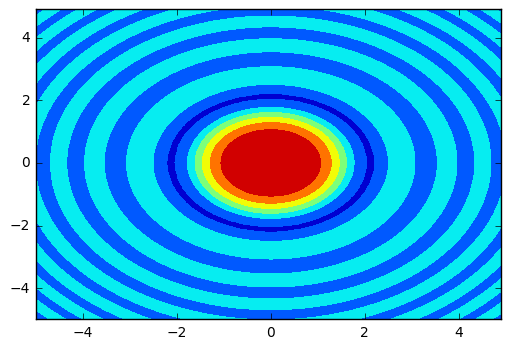

In [32]:
from matplotlib import pyplot as plt

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

plt.contourf(x,y,z)
plt.show()